# Final Project: Team M.E.M

***

### Definition of "Best Neighborhood":
* We defined the best neighborhood as the place that was the best in leisure activities for kids and families, since this would make it a very fun place to live. We looked at some data sets, and found a few that would support this idea. We used those data sets to create our metric.

### Metric:
* The metric that we used to measure the best neighborhood is the number of playgrounds, the number of playing fields, and the largest pool capacity in gallons.

***

### Data:
* We then began to analyze our data to determine the best neighborhood.

In [1]:
#load pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

#Each set of data is loaded in its section.

***

### The Playgrounds of Pittsburgh:
* I worked on figuring out which neighborhoods had the **most playgrounds**. 

In [2]:
#load data from WPRDC
playgrounds = pd.read_csv("./Files/playgrounds.csv", index_col="id", parse_dates=True)

playgrounds.head()

,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


* Since the table was set up by the name of the playground, I went off of the "neighborhood" column to see how many times each neighborhood showed up. 

In [3]:
p2 = playgrounds['neighborhood'].value_counts()
print(p2)

Squirrel Hill South      8
Beechview                5
South Side Slopes        5
Allegheny Center         4
Sheraden                 4
                        ..
Windgap                  1
Shadyside                1
New Homestead            1
Spring Hill-City View    1
Central Oakland          1
Name: neighborhood, Length: 67, dtype: int64


* I then used this information to make a bar plot to see the data more clearly.

Text(0, 0.5, 'Number of Playgrounds')

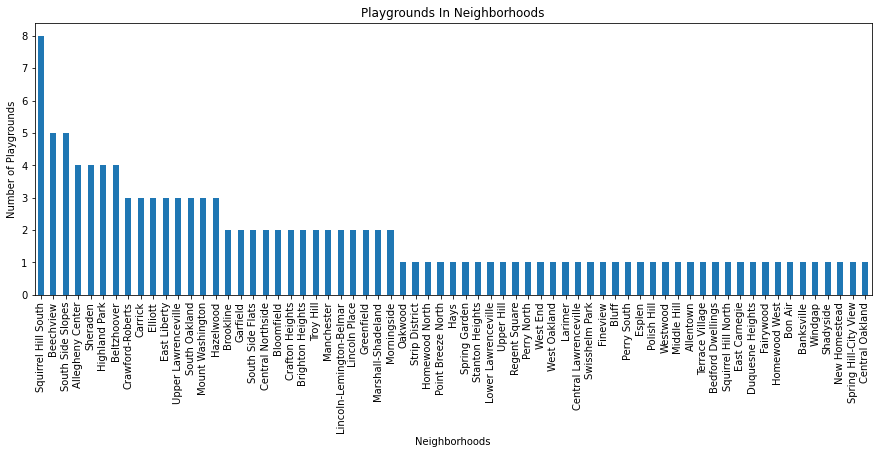

In [4]:
bPlot = p2.plot.bar(legend=False, figsize = (15,5))
plt.title("Playgrounds In Neighborhoods")
plt.xlabel("Neighborhoods")   
plt.ylabel("Number of Playgrounds")

* I made a couple more bar plots, narrowing down the data each time so it would be easier to see which neighborhoods are the "best."

Text(0, 0.5, 'Number of Playgrounds')

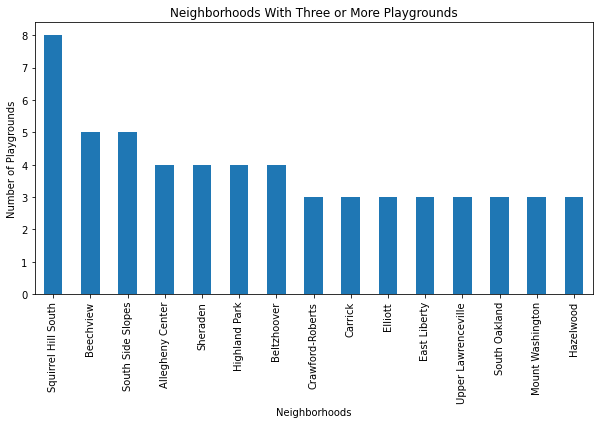

In [5]:
#narrow down to 3 or more
moreThanTwo = p2.loc[p2>2]
moreThanTwo.plot.bar(legend=False, figsize = (10,5))
plt.title("Neighborhoods With Three or More Playgrounds")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Playgrounds")

Text(0, 0.5, 'Number of Playgrounds')

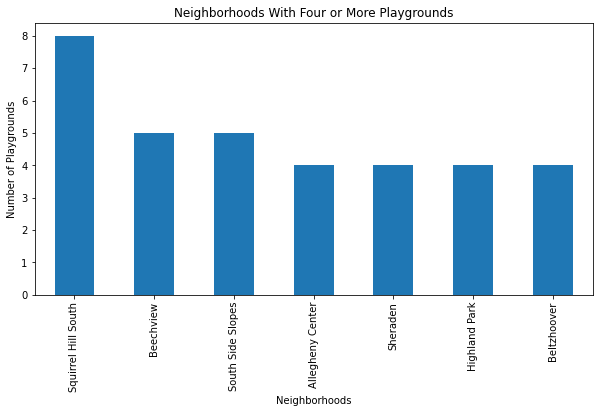

In [6]:
#narrow down to 4 or more
moreThanThree = p2.loc[p2>3]
moreThanThree.plot.bar(legend=False, figsize = (10,5))
plt.title("Neighborhoods With Four or More Playgrounds")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Playgrounds")

#### The Results: 
* From this, I determined that:
    1. **Squirrel Hill South** had the **most** playgrounds, at **8**.
    2. **Beechview** and **South Side Slopes** tied for **second**, both having **5**.
    3. **Highland Park, Allegheny Center, Beltzhoover**, and **Sheraden** are all tied at **third**, with **4** playgrounds.

***

### The Playing Fields of Pittsburgh:

First, I intialized the variables playing_fields and playing_fields_names for my dataset.

In [7]:
#load data from WPRDC
playing_fields = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23", index_col = "neighborhood", parse_dates = True)
playing_fields_names = pd.read_csv("https://data.wprdc.org/datastore/dump/6af89346-b971-41d5-af09-49cfdb4dfe23", index_col = "id", parse_dates = True)

I utilized the len() function, groupby operation, and the count() function in order to calculate the number of playing fields within the neighborhoods of Pittsburgh.

In [8]:
number_of_neighborhoods = len(playing_fields.groupby("neighborhood").count())
print("The city of Pittsburgh has a total of " + str(number_of_neighborhoods) + " neighborhoods.")

The city of Pittsburgh has a total of 51 neighborhoods.


Here I made the decision to place each neighborhood into a list and reuse the groupby function to later create a dataframe and loop through that list.

In [9]:
#neighborhood_names = playing_fields.groupby("neighborhood").count()
neighborhood_names = []
for i in playing_fields_names["neighborhood"]:
    if i not in neighborhood_names:
        neighborhood_names.append(i)
    else:
        continue
neighborhood_names = sorted(neighborhood_names)
print(neighborhood_names)

playing_fields.groupby("neighborhood").count()

['Allegheny Center', 'Allentown', 'Arlington', 'Banksville', 'Bedford Dwellings', 'Beechview', 'Beltzhoover', 'Brighton Heights', 'Brookline', 'Carrick', 'Central Lawrenceville', 'Central Oakland', 'Crafton Heights', 'East Hills', 'East Liberty', 'Elliott', 'Fineview', 'Garfield', 'Greenfield', 'Hazelwood', 'Highland Park', 'Homewood South', 'Larimer', 'Lincoln Place', 'Lincoln-Lemington-Belmar', 'Lower Lawrenceville', 'Manchester', 'Marshall-Shadeland', 'Morningside', 'Mount Washington', 'Oakwood', 'Perry North', 'Perry South', 'Polish Hill', 'Regent Square', 'Shadyside', 'Sheraden', 'South Oakland', 'South Side Flats', 'South Side Slopes', 'Spring Garden', 'Spring Hill-City View', 'Squirrel Hill North', 'Squirrel Hill South', 'Stanton Heights', 'Terrace Village', 'Troy Hill', 'Upper Lawrenceville', 'West End', 'Westwood', 'Windgap']


,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,backstop,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,,,
Allegheny Center,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Allentown,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1
Arlington,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Banksville,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Bedford Dwellings,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Beechview,3,3,3,3,3,3,2,2,2,2,0,3,3,3,3,3,3,3,3,3
Beltzhoover,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Brighton Heights,7,7,7,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7
Brookline,6,6,6,6,6,6,5,5,5,5,0,6,6,6,6,6,6,6,6,6


I placed all of the neighborhoods into a DataFrame called playing_fields_per_neighborhood. 
After this, I decided to use a bar graph to represent this data because it would make it easier to interpret as opposed to other graphs.

Text(0.5, 1.0, 'Playing Fields Per Neighborhood')

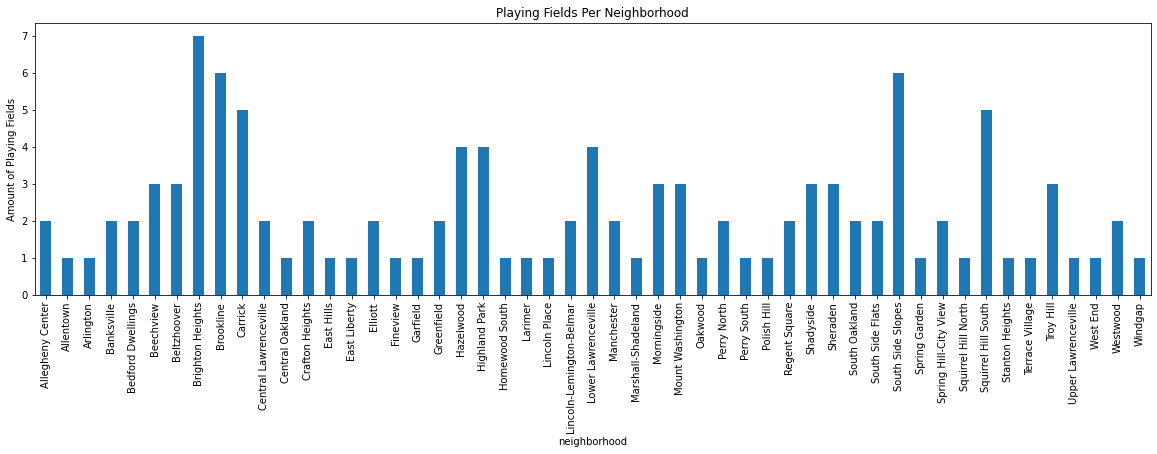

In [10]:
playing_fields_per_neighborhood = pd.DataFrame({"neighborhood": ["Allegheny Center", "Allentown", "Arlington", "Banksville", "Bedford Dwellings", "Beechview", "Beltzhoover", "Brighton Heights", 
                                                                 "Brookline", "Carrick", "Central Lawrenceville", "Central Oakland", "Crafton Heights", "East Hills", "East Liberty", "Elliott", 
                                                                 "Fineview", "Garfield", "Greenfield", "Hazelwood", "Highland Park", "Homewood South", "Larimer", "Lincoln Place", 
                                                                 "Lincoln-Lemington-Belmar", "Lower Lawrenceville", "Manchester", "Marshall-Shadeland", "Morningside", "Mount Washington", 
                                                                 "Oakwood", "Perry North", "Perry South", "Polish Hill", "Regent Square", "Shadyside", "Sheraden", "South Oakland", "South Side Flats",
                                                                 "South Side Slopes", "Spring Garden", "Spring Hill-City View", "Squirrel Hill North", "Squirrel Hill South", "Stanton Heights", 
                                                                 "Terrace Village", "Troy Hill", "Upper Lawrenceville", "West End", "Westwood", "Windgap"], 
                                                "amount of playing fields" : [2, 1, 1, 2, 2, 3, 3, 7, 6, 5, 2, 1, 2, 1, 1, 2, 1, 1, 2, 4, 4, 1, 1, 1, 2, 4, 2, 1, 3, 3, 1, 2, 1, 1, 2, 3, 3, 
                                                                              2, 2, 6, 1, 2, 1, 5, 1, 1, 3, 1, 1, 2, 1]})
playing_field_bargraph = playing_fields_per_neighborhood.plot.bar(x = "neighborhood", legend = False, figsize = (20, 5))
plt.ylabel("Amount of Playing Fields")
plt.title("Playing Fields Per Neighborhood")

Next, I found the number of playing fields in the neighborhoods of Pittsburgh, as well as the mean number of playing fields per neighborhood.

In [11]:
pitts_playing_fields = 0 
for i in range(51):
    pitts_playing_fields = pitts_playing_fields + playing_fields_per_neighborhood["amount of playing fields"][i]

mean = pitts_playing_fields / 51

print("The total number of playing fields in the city of Pittsburgh is " + str(pitts_playing_fields) + ".")
print("The mean number of playing fields per neighborhood in the city of Pittsburgh is " + str(mean) + ".")

The total number of playing fields in the city of Pittsburgh is 113.
The mean number of playing fields per neighborhood in the city of Pittsburgh is 2.215686274509804.


Finally, I used a for loop to calculate the number of neighborhooods with a total amount of playing fields greater than the mean.

In [12]:
for i in range(51):
    if playing_fields_per_neighborhood["amount of playing fields"][i] > 2:
        print(playing_fields_per_neighborhood["neighborhood"][i])

Beechview
Beltzhoover
Brighton Heights
Brookline
Carrick
Hazelwood
Highland Park
Lower Lawrenceville
Morningside
Mount Washington
Shadyside
Sheraden
South Side Slopes
Squirrel Hill South
Troy Hill


Text(0.5, 1.0, 'Top 15 Neighborhoods for Playing Fields')

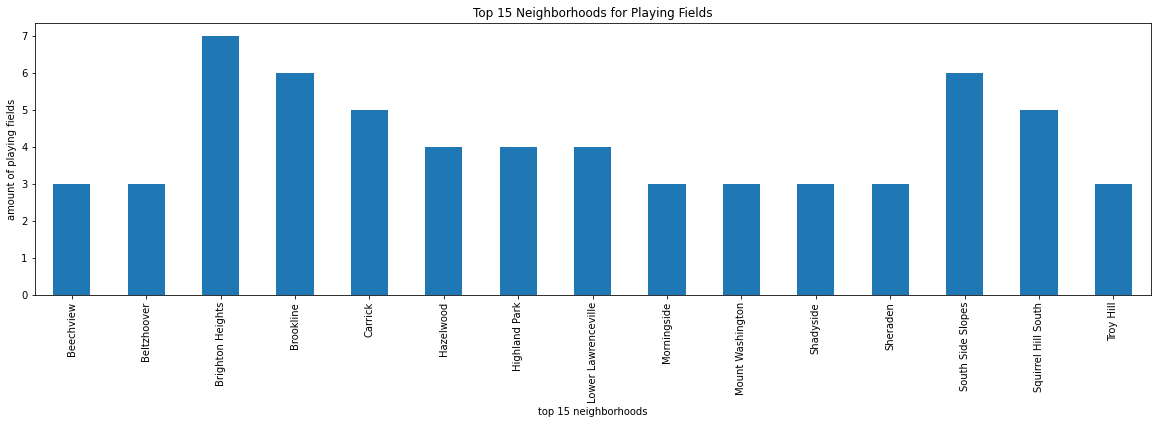

In [13]:
top15_neighborhoods = pd.DataFrame({"top 15 neighborhoods": ["Beechview", "Beltzhoover", "Brighton Heights", "Brookline", "Carrick",
                                                            "Hazelwood", "Highland Park", "Lower Lawrenceville", "Morningside",
                                                            "Mount Washington", "Shadyside", "Sheraden", "South Side Slopes", 
                                                            "Squirrel Hill South", "Troy Hill"], 
                                    "amount of playing fields": [3, 3, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 6, 5, 3]})
top15_neighborhoods_bargraph = top15_neighborhoods.plot.bar(x = "top 15 neighborhoods", legend = False, figsize = (20, 5))
plt.ylabel("amount of playing fields")
plt.title("Top 15 Neighborhoods for Playing Fields")

#### The Results:
The Neighborhood that has the greatest amount of playing fields is Brighton Heights. It leads Pittsburgh with seven total.
Brookline and South Side Slopes each follow with six playing fields, which is the second most.
Carrick and Stanton Heights each have five, which is the third most. 
Additionally, ten other neighborhoods had three playing fields (which was greater than the mean).

***

### The Pools of Pittsburgh:

In [14]:
# load data from file
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a", index_col = "neighborhood")
pools.head(30)

,id,name,type,retired,water_source,capacity,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Bedford Dwellings,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
Banksville,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
Beechview,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,4,19,42003191600,5,19,6,4-28,40.414989,-80.019170
Bloomfield,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
Hazelwood,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,5,15,42003562300,3,15,4,2-13,40.405065,-79.936896
Troy Hill,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,1,24,42003240600,1,24,1,1-2,40.458739,-79.988366
East Hills,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,9,13,42003130600,2,13,5,3-19,40.453091,-79.871036
Highland Park,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280
Highland Park,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927


This table organizes all the data from the Pittsburgh Pools dataset by neighborhood.

In [15]:
# dropped unnecessary columns from the data leaving only capacity column left
pools2 = pools.drop(['id','name','type','retired', 'water_source', 'image', 'council_district', 'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'], axis=1)
pools2.head(30)

,capacity
neighborhood,
Bedford Dwellings,538000.0
Banksville,166320.0
Beechview,NaN
Bloomfield,335000.0
Hazelwood,NaN
Troy Hill,NaN
East Hills,NaN
Highland Park,NaN
Highland Park,560242.0


Now I removed all of the unnecessary columns for our analysis. After doing this, I was only left with the capacity and neighborhood columns.

In [16]:
# now need to remove any rows that have a NaN capacity 
pools2 = pools2.dropna()
pools2.head(30)

,capacity
neighborhood,
Bedford Dwellings,538000.0
Banksville,166320.0
Bloomfield,335000.0
Highland Park,560242.0
Homewood South,171075.0
Brighton Heights,205800.0
Greenfield,195000.0
Lincoln Place,18000.0
Brookline,417657.0


From the table before, I noticed that some of the pools have NaN capacity. Upon further investigation, I realizedthat those pools are spray parks or children pools. I do not want to include those pools in our analysis because I want to determine the best pool among actual pools made for adults. So, I dropped the NaN rows and created a new table for better visualization.

Text(0, 0.5, 'Pool Capacity (in gallons)')

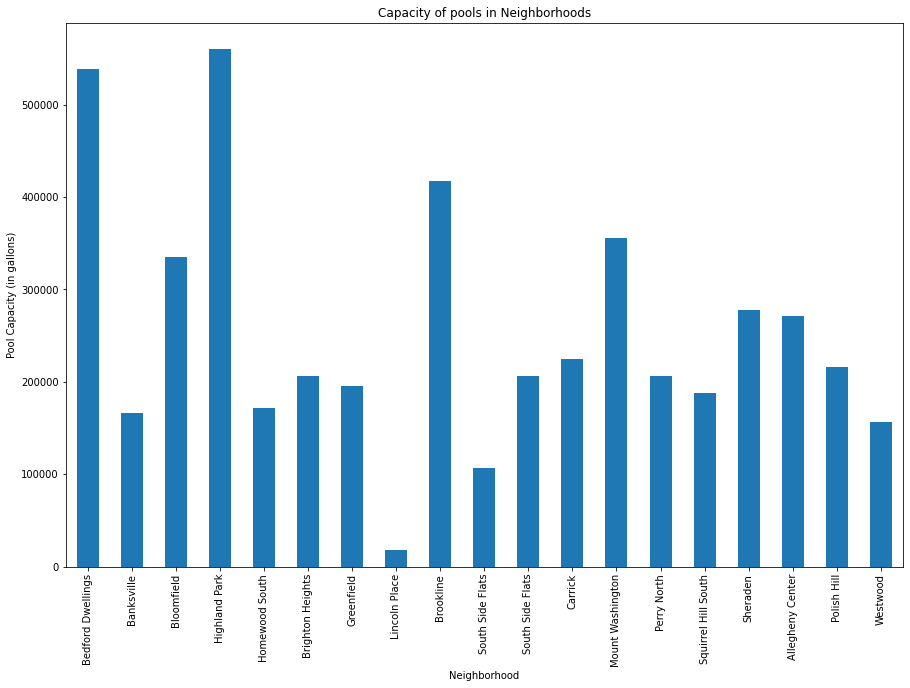

In [17]:
#plotting the data to get a better visual
poolPlot = pools2.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("Neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

This is a bar graph of all the applicable Pittsburgh pools and their corresponding capacity (in gallons)

Text(0, 0.5, 'Pool Capacity (in gallons)')

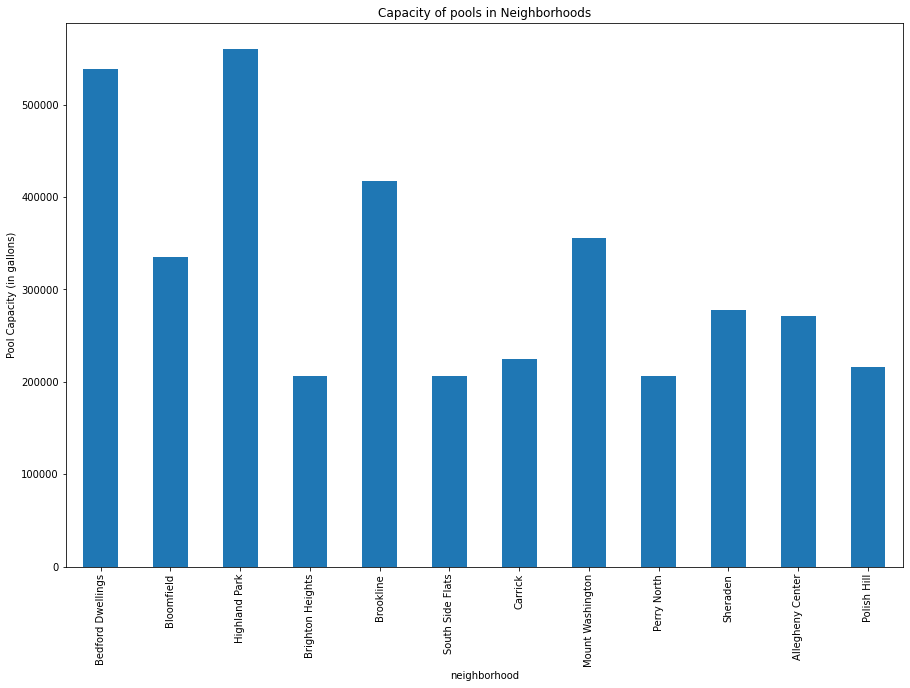

In [18]:
#narrow down the capacity to be above 200000
greaterThan2 = pools2.loc[pools2['capacity'] > 200000]
greaterThan2.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

In order to find the largest pool, I narrowed it down so that only the pools greater than 200000 gallons were graphed.

Text(0, 0.5, 'Pool Capacity (in gallons)')

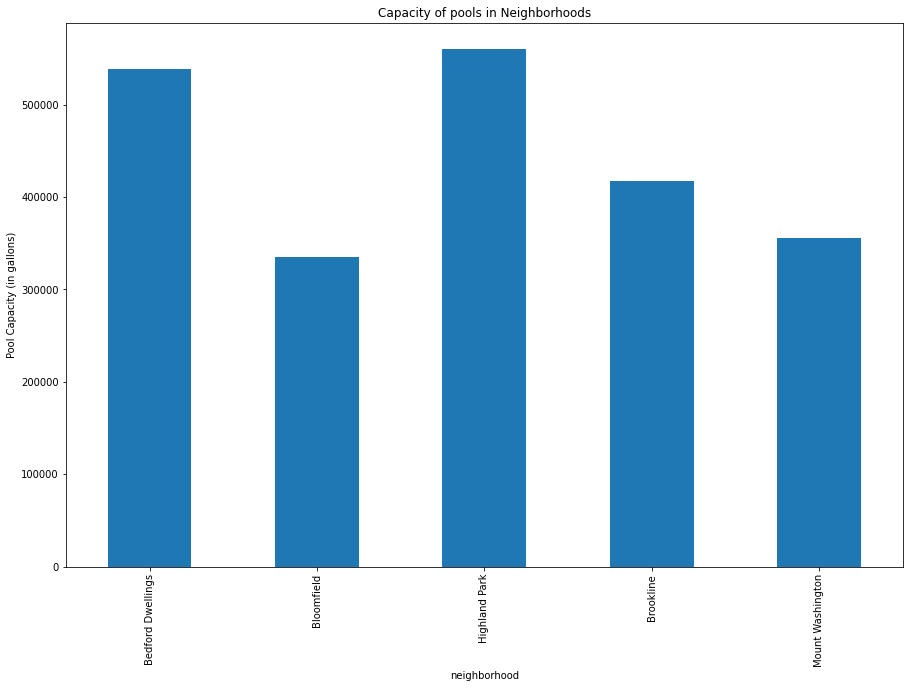

In [19]:
#plotting data for capacity greater than 300000
greaterThan3 = pools2.loc[pools2['capacity'] > 300000]
greaterThan3.plot.bar(legend=False, figsize = (15,10))
plt.xlabel("neighborhood")
plt.title("Capacity of pools in Neighborhoods")
plt.ylabel("Pool Capacity (in gallons)")

The graph before did not narrow down the pools enough, so I narrowed the pools even further and decided to graph the pools with a capacity greater than 300000 gallons

In [20]:
greaterThan3.sort_values("capacity", ascending=False).head

<bound method NDFrame.head of                    capacity
neighborhood               
Highland Park      560242.0
Bedford Dwellings  538000.0
Brookline          417657.0
Mount Washington   356000.0
Bloomfield         335000.0>

Lastly, I sorted the final graphs values from descending order to gain a better understanding of which pool in each neighborhood have the largest capacity in gallons.

#### The Results:

The pool with the largest capacity in gallons is loacted in Highland Park with 560242 gallons. Bedford Dwellings follows for second place at 538000 gallons, and Brookline comes in third at 417657 gallons.

***

### Conclusion: What is the best neighborhood?
* Summary of Data Sets (top neighborhoods from above, and broadened where needed):
    * Playgrounds:
        1. Squirrel Hill South had 8 playgrounds
        2. Beechview and South Side Slopes had 5 playgrounds.
        3. Highland Park, Allegheny Center, Beltzhoover, and Sheraden had 4 playgrounds. 
        4. Three Playgrounds: Carrick, Elliot, Mount Washington, Uppper Lawrenceville, Hazelwood, East Liberty, Crawford-Roberts, South Oakland.
        5. Two Playgrounds: Brighton Heights. (not all listed) 
    * Playing Fields:
        1. The Neighborhood that has the greatest amount of playing fields is Brighton Heights. It leads Pittsburgh with seven total.
        2. Brookline and South Side Slopes each follow with six playing fields, which is the second most.
        3. Carrick and Stanton Heights each have five, which is the third most. 
        4. Four Fields: Hazelwood, Highland Park, Lower Lawrenceville.
        5. Three Fields: Beechview, Beltzhoover, Morningside, Mount Washington, Shadyside, Sheredan, Troy Hill.
    * Pools:
        1. The pool with the largest capacity in gallons is loacted in Highland Park with 560242 gallons. 
        2. Bedford Dwellings follows for second place at 538000 gallons.
        3. Brookline comes in third at 417657 gallons.
        4. Mount Washington had 356000 gallons.
        5. Bloomfield had 335000 gallons. 
        6. Sheraden had 278000 gallons. 
        7. Allegheny Center had 271000 gallons. 
        8. Carrick had 224100 gallons.
        9. Polish Hill had 215451 gallons. 
        10. Brighton Heights and South Side Flats had 205800 gallons.
        11. Perry North had 205800 gallons. 

#### Our Best Neighborhood: Highland Park
* Our data sets had many top neighborhoods in common, but none the exact same as the "absolute top best." so we had to go down the lists a bit to compare. We did several comparisons to pick:
    * Carrick was third in playing fields, fourth in playgrounds, and eighth in pools.
    * Beechview was second in playgrounds and fifth in playing fields, but had a NaN value for pools. 
    * Brighton Heights was first in playing fields, tenth in pools, and fifth in playgrounds. 
    * Highland Park was first in pools, third in playgrounds, and fourth in playing fields.
    
* These are the comparisons that led us to chose Highland Park as the "Best Neighborhood in Pittsburgh." With a 560242 gallon pool capacity, 4 playgrounds, and 4 playing fields, while it wasn't the highest in every category, none of the other neighborhoods could come close to it. 

#### Erin's Conclusion:
* I was kind of shocked by the results, just because I had never heard the name "Highland Park" before. My family is from Pittsburgh, but I haven't lived there since I've been 10, so I'm not very familiar with the different neighborhoods. So, I decided to look it up. [On the Pittsburgh Parks website](https://pittsburghparks.org/explore-your-parks/regional-parks/highland-park/) I found that it has "...a popular bike track, swimming pool, sand volleyball courts, and the Pittsburgh Zoo and PPG Aquarium." I found that neat, since it fits with our metric. I feel that this, along with our data, supports the idea of Highland Park being the best neighborhood in Pittsburgh. 

#### Michael's Conclusion:
* I am not very familiar with the neighborhoods of Pittsburgh, but the results of our study were not all that unpredictable. For example, the city that was the best neighborhood by our metric and standard of bestness of a neighborhood in Pittsburgh was Highland Park and it had a total area of 1.163 mi². On the other hand, the neighborhood, Stanton Heights that ranked poorly by our metric and standard of bestness had 470 acres (which is less than the area of Highland Park). So, it makes sense that Highland Park ranked higher because it has more room for pools, playgrounds, and playing fields. This is further evidence that our conclusion that Highland Park is the best neighborhood in Pittsburgh is reliable.

#### Meryem's Conclusion:
* Although I am from Pittsburgh, I was very shocked to see that Highland Park was rated as the best neighborhood. I have lived here my whole life, but I have never even heard of the neighborhood Highland Park. However, based on the metrics we chose and data we collected, I trust that Highland Park is considered the best neighborhood in Pittsburgh.